In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow.keras.optimizers as optim
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Exercise 1
## Tasks
1. Download and prepare CIFAR-10 dataset 
1. Write a simple CNN network for classifying images
    - use LeakyReLU as the activation function
    - use SGD as the optimizer and 0.0001 as the learning rate, and keep all default parameters
    - Report the accuracy on the test set
1. Change the optimiser to Adam and run again the experiment. Report accuracy on test set.
1. Swap the LeakyReLUs for Tanh. Then run again the experiment and report accuracy on test set. Make a separate file for this experiment.
1. Visualize the results of these runs on a Tensorboard. Just put any screenshot of the web interface with the experiments to prove you got it working is enough. (for example show the training loss on tensorboard)

## Task 1, download CIFAR-10 dataset

In [2]:
cifar_10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar_10.load_data()

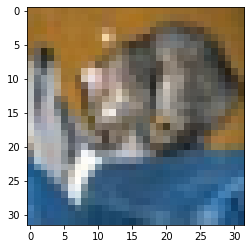

In [3]:
plt.figure()
plt.imshow(test_images[0])
plt.grid(False)
plt.show()

In [4]:
train_images[0].shape
train_labels[0].shape

(1,)

## Task 2

In [5]:
alpha=0.3
epochs=60
activation_func = layers.LeakyReLU(alpha=alpha)

model1 = Sequential([
  layers.Conv2D(32, (3, 3), padding='same', activation=activation_func, input_shape=(32, 32, 3)),
  layers.Conv2D(64, (3, 3), padding='same', activation=activation_func),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=activation_func),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation=activation_func),
  layers.Dense(10, activation="softmax")
])

model1.compile(optimizer=optim.SGD(learning_rate=0.0001), 
            loss=SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [6]:
history1 = model1.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_data=(test_images, test_labels)
)

Epoch 1/120
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3828 - accuracy: 0.2901 - val_loss: 1.8252 - val_accuracy: 0.3549
Epoch 2/120
1563/1563 [==============================] - 16s 11ms/step - loss: 1.7363 - accuracy: 0.3895 - val_loss: 1.6694 - val_accuracy: 0.4128
Epoch 3/120
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6213 - accuracy: 0.4286 - val_loss: 1.5961 - val_accuracy: 0.4374
Epoch 4/120
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5467 - accuracy: 0.4560 - val_loss: 1.5388 - val_accuracy: 0.4616
Epoch 5/120
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4933 - accuracy: 0.4731 - val_loss: 1.4811 - val_accuracy: 0.4758
Epoch 6/120
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4495 - accuracy: 0.4915 - val_loss: 1.4706 - val_accuracy: 0.4790
Epoch 7/120
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4122 - accuracy: 0.5039 - val_loss: 1

1563/1563 [==============================] - 17s 11ms/step - loss: 0.8502 - accuracy: 0.7071 - val_loss: 1.0343 - val_accuracy: 0.6471
Epoch 57/120
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8452 - accuracy: 0.7107 - val_loss: 1.0036 - val_accuracy: 0.6564
Epoch 58/120
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8396 - accuracy: 0.7130 - val_loss: 1.0072 - val_accuracy: 0.6537
Epoch 59/120
1563/1563 [==============================] - 16s 11ms/step - loss: 0.8356 - accuracy: 0.7139 - val_loss: 1.0190 - val_accuracy: 0.6509
Epoch 60/120
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8319 - accuracy: 0.7138 - val_loss: 1.0010 - val_accuracy: 0.6606
Epoch 61/120
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8272 - accuracy: 0.7167 - val_loss: 1.0531 - val_accuracy: 0.6372
Epoch 62/120
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8219 - accuracy: 0.7191 - val_loss: 1.0282 

1563/1563 [==============================] - 16s 10ms/step - loss: 0.6312 - accuracy: 0.7859 - val_loss: 0.9835 - val_accuracy: 0.6813
Epoch 112/120
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6291 - accuracy: 0.7880 - val_loss: 0.9714 - val_accuracy: 0.6808
Epoch 113/120
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6245 - accuracy: 0.7886 - val_loss: 0.9731 - val_accuracy: 0.6815
Epoch 114/120
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6220 - accuracy: 0.7881 - val_loss: 0.9758 - val_accuracy: 0.6853
Epoch 115/120
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6177 - accuracy: 0.7907 - val_loss: 0.9758 - val_accuracy: 0.6831
Epoch 116/120
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6136 - accuracy: 0.7931 - val_loss: 0.9751 - val_accuracy: 0.6848
Epoch 117/120
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6109 - accuracy: 0.7930 - val_loss: 0

Evaluate the model

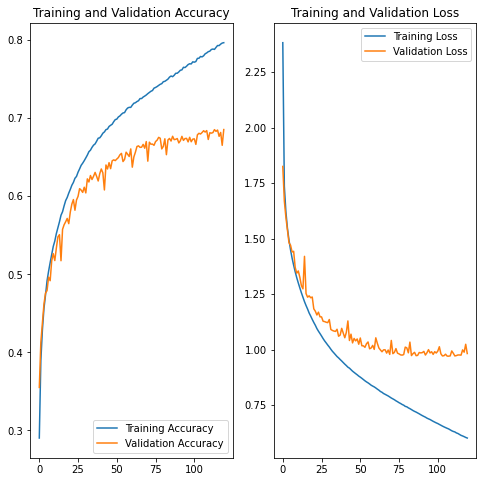

In [7]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Task 3, change optimizer to ADAM

In [8]:
model2 = Sequential([
  layers.Conv2D(32, (3, 3), padding='same', activation=activation_func, input_shape=(32, 32, 3)),
  layers.Conv2D(64, (3, 3), padding='same', activation=activation_func),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=activation_func),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation=activation_func),
  layers.Dense(10, activation="softmax")
])

model2.compile(optimizer=optim.Adam(learning_rate=0.0001),
            loss=SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

model2.summary()

history2 = model2.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_data=(test_images, test_labels)
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

1563/1563 [==============================] - 17s 11ms/step - loss: 0.0420 - accuracy: 0.9852 - val_loss: 3.0110 - val_accuracy: 0.6796
Epoch 48/60
1563/1563 [==============================] - 16s 11ms/step - loss: 0.0496 - accuracy: 0.9832 - val_loss: 3.1392 - val_accuracy: 0.6768
Epoch 49/60
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0365 - accuracy: 0.9874 - val_loss: 3.0911 - val_accuracy: 0.6804
Epoch 50/60
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0433 - accuracy: 0.9849 - val_loss: 3.2236 - val_accuracy: 0.6769
Epoch 51/60
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0416 - accuracy: 0.9859 - val_loss: 3.2230 - val_accuracy: 0.6787
Epoch 52/60
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0440 - accuracy: 0.9854 - val_loss: 3.2071 - val_accuracy: 0.6798
Epoch 53/60
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0365 - accuracy: 0.9877 - val_loss: 3.3667 - val_

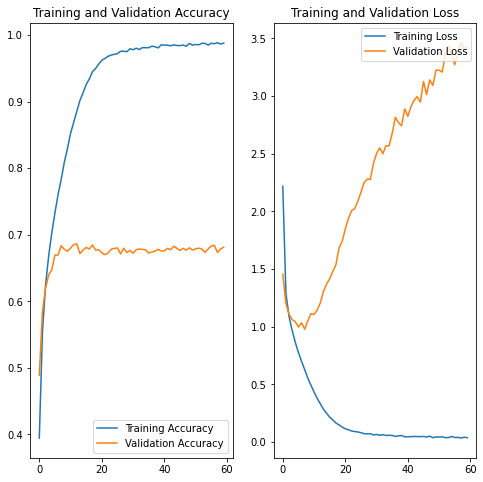

In [9]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Save models

In [8]:
!mkdir saved_model

model1.save('saved_model/model1') # SGD model
model2.save('saved_model/model2') # Adam model

mkdir: cannot create directory ‘saved_model’: File exists
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/model1_120 epochs/assets
